0.1555401999503374
0.17488219996448606


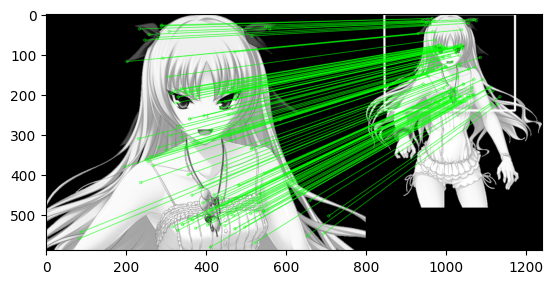

129
[[[ 4.6971519e+01  2.2757572e-01]]

 [[ 4.7372253e+01  2.4096541e+02]]

 [[ 3.7313712e+02  2.4100220e+02]]

 [[ 3.7361996e+02 -3.6927196e-04]]]
[[[  0.   0.]]

 [[  0. 589.]]

 [[799. 589.]]

 [[799.   0.]]]


In [3]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
from time import perf_counter as time

t = time()
# img2 = cv.imread('C:/Users/khoi/Videos/Screenshot 2023-10-29 04-04-21.png',0)          # queryImage
# img1 = cv.imread('R:/unless/cg/ev/a_ren_01_a.png', 0)          # trainImage
# img1 = cv.imread('C:/Users/khoi/Videos/Screenshot 2023-10-29 04-29-37.png',0)          # queryImage
# img2 = cv.imread('R:/unless/stand/copy/m_040/a_ren_1a0100.png', 0)          # trainImage
# img2 = cv.imread('R:/unless/stand/copy/m_040/c_cha_1c0100.png', 0)          # trainImage
# img1 = cv.imread('C:/Users/khoi/Videos/Screenshot 2024-02-17 16-13-25.png',0)
# img2 = cv.imread('E:/Dataset/amakano2/720p/e_chi03N_1.png',0)          # trainImage

# img1 = cv.imread('C:/Users/khoi/Videos/Screenshot 2024-02-27 22-53-06.png',0)
img1 = cv.imread('C:/Users/khoi/Videos/Screenshot 2024-02-27 22-50-56.png',0)
# img2 = cv.imread('E:/Dataset/amakano2/720p/e_chi08N_1.png',0)
img2 = cv.imread('E:/Dataset/amakano2/1080p/e_chi08N_1.png',0)

img1 = cv.imread('C:/Users/khoi/Videos/hajiron.png',0)
img2 = cv.imread('R:/bg.png',0)

img1 = cv.imread('R:/majikoi/Z/S05_CHRI_2_04A_00_00.png',0)
img2 = cv.imread('R:/majikoi/N/S05_CHRI_2_04A_00_00.png',0)

# Initiate SIFT detector
sift = cv.SIFT_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)
print(time()-t)
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks = 50)
flann = cv.FlannBasedMatcher(index_params, search_params)
matches = flann.knnMatch(des1,des2,k=2)
# store all the good matches as per Lowe's ratio test.
good = []
for m,n in matches:
    if m.distance < 0.7*n.distance:
        good.append(m)
MIN_MATCH_COUNT = 7
if len(good)>MIN_MATCH_COUNT:
    src_pts = np.float32([ kp1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
    dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)
    M, mask = cv.findHomography(src_pts, dst_pts, cv.RANSAC,5.0)
    matchesMask = mask.ravel().tolist()
    h,w = img1.shape
    pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
    dst = cv.perspectiveTransform(pts,M)
    img2 = cv.polylines(img2,[np.int32(dst)],True,255,3, cv.LINE_AA)
else:
    print( "Not enough matches are found - {}/{}".format(len(good), MIN_MATCH_COUNT) )
    matchesMask = None
print(time()-t)
draw_params = dict(matchColor = (0,255,0), # draw matches in green color
                   singlePointColor = None,
                   matchesMask = matchesMask, # draw only inliers
                   flags = 2)
img3 = cv.drawMatches(img1,kp1,img2,kp2,good,None,**draw_params)
plt.imshow(img3),plt.show()
print(len(good))
print(dst)
print(pts)

In [4]:
a0, a1 = dst[0][0]
b0, b1 = dst[1][0]
c0, c1 = dst[2][0]
d0, d1 = dst[3][0]

print((b1 - a1)/pts[2][0][1])
print((c1 - d1)/pts[2][0][1])
print((b1 - d1)/pts[2][0][1])
print((c1 - a1)/pts[2][0][1])
print((c0 - a0)/pts[2][0][0])
print((d0 - b0)/pts[2][0][0])
print((c0 - b0)/pts[2][0][0])
print((d0 - a0)/pts[2][0][0])

print(pts[2][0][1]/(b1 - a1))
print(pts[2][0][1]/(c1 - d1))
print(pts[2][0][1]/(b1 - d1))
print(pts[2][0][1]/(c1 - a1))
print(pts[2][0][0]/(c0 - a0))
print(pts[2][0][0]/(d0 - b0))
print(pts[2][0][0]/(c0 - b0))
print(pts[2][0][0]/(d0 - a0))

0.408723
0.40917245
0.40910998
0.40878543
0.40821725
0.40832004
0.4077157
0.40882158
2.4466448
2.4439573
2.4443305
2.446271
2.449676
2.4490592
2.4526894
2.446055


In [4]:
img2 = cv.imread('R:/unless/cg/ev/a_ren_01_a.png', cv.IMREAD_COLOR)     
img2# trainImage


array([[[217, 142,  98],
        [217, 142,  98],
        [216, 141,  98],
        ...,
        [250, 229, 198],
        [250, 229, 198],
        [250, 229, 198]],

       [[216, 141,  98],
        [216, 142,  98],
        [216, 142,  97],
        ...,
        [250, 229, 198],
        [250, 230, 198],
        [250, 229, 198]],

       [[218, 142,  98],
        [217, 142,  98],
        [217, 142,  98],
        ...,
        [250, 230, 199],
        [250, 230, 199],
        [250, 229, 198]],

       ...,

       [[ 58,  55,  31],
        [ 56,  51,  28],
        [ 52,  48,  25],
        ...,
        [204, 211, 255],
        [205, 211, 254],
        [204, 210, 254]],

       [[ 56,  52,  29],
        [ 54,  49,  27],
        [ 50,  47,  24],
        ...,
        [205, 211, 254],
        [205, 211, 254],
        [204, 210, 255]],

       [[ 55,  50,  28],
        [ 53,  48,  27],
        [ 53,  49,  26],
        ...,
        [205, 211, 254],
        [205, 211, 255],
        [204, 211, 255]]

In [8]:
print(720/(439-40))
print(1080/(894-184))

1.8045112781954886
1.5211267605633803


In [4]:
720/400

1.8

In [8]:
print((1737-242)/1920)
print((842.53-2.30)/1080)
print((842.77-2.25)/1080)

0.7786458333333334
0.7779907407407407
0.7782592592592592


0.05809179999050684
0.10535160001018085


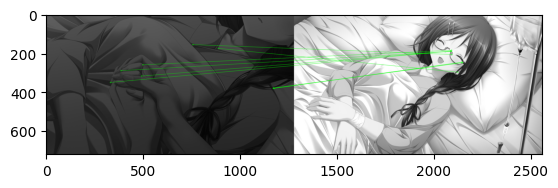

67
[[[803.43384 186.90585]]

 [[811.477   187.31532]]

 [[825.27625 196.90575]]

 [[808.6351  180.19609]]]
[[[   0.    0.]]

 [[   0.  719.]]

 [[1279.  719.]]

 [[1279.    0.]]]


In [28]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
from time import perf_counter as time

t = time()
img1 = cv.imread('r:/decode/ev_coc03k.png',0)          # queryImage
img2 = cv.imread('r:/decode/ev_coc03a.png',0)          # trainImage

# Initiate ORB detector
orb = cv.ORB_create()

# find the keypoints and descriptors with ORB
kp1, des1 = orb.detectAndCompute(img1,None)
kp2, des2 = orb.detectAndCompute(img2,None)
print(time()-t)


bf = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True)
matches = bf.match(des1,des2)
good = sorted(matches, key = lambda x:x.distance)

MIN_MATCH_COUNT = 10
if len(good)>MIN_MATCH_COUNT:
    src_pts = np.float32([ kp1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
    dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)
    M, mask = cv.findHomography(src_pts, dst_pts, cv.RANSAC,5.0)
    matchesMask = mask.ravel().tolist()
    h,w = img1.shape
    pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
    dst = cv.perspectiveTransform(pts,M)
    img2 = cv.polylines(img2,[np.int32(dst)],True,255,3, cv.LINE_AA)
else:
    print( "Not enough matches are found - {}/{}".format(len(good), MIN_MATCH_COUNT) )
    matchesMask = None
print(time()-t)
draw_params = dict(matchColor = (0,255,0), # draw matches in green color
                   singlePointColor = None,
                   matchesMask = matchesMask, # draw only inliers
                   flags = 2)
img3 = cv.drawMatches(img1,kp1,img2,kp2,good,None,**draw_params)
plt.imshow(img3),plt.show()
print(len(good))
print(dst)
print(pts)

In [32]:
a = dict()
a['a'] = ()
len(a)

1